# `Multi-class Weather Image Classification`

### `You have been provided this .ipynb file and dataset having four classes (cloudy, rain, shine and sunrise)`
### `All the images are labeled classwise, perform all the following tasks`

In [87]:
'''
# 1- Import all possible required libraries here
'''

# Write your code here

import os, shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import load_img

import random
from scipy import ndarray

# image processing library
import skimage as sk
from skimage import transform
from skimage import util
from skimage import io


from keras import layers
from keras import models
from keras import optimizers

In [8]:
'''
# 2- Load the dataset and count how many total instances are in complete dataset (Display the results)?
'''

# Write your code here

base_path = 'your_path'

Total_num_of_instances = len(os.listdir(base_path))
print("Total Number of Instances in Complete Dataset : ",Total_num_of_instances)

Total Number of Instances in Complete Dataset :  1125


         Instances
Cloudy         300
Rain           215
Shine          253
Sunrise        357


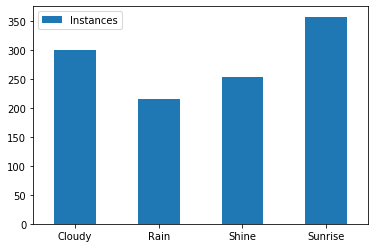

In [77]:
'''
# 3- Count how many instances are for each class (Display in table format and plot the bar graph)
'''

# Write your code here

# cloudy
# rain
# shine
# sunrise

list_of_obj = os.listdir(base_path)

cloudy_list = 0
rain_list = 0
shine_list = 0
sunrise_list = 0

for instance in list_of_obj:
    if instance[0:2] == 'cl':
        cloudy_list += 1
    if instance[0:2] == 'ra':
        rain_list += 1
    if instance[0:2] == 'sh':
        shine_list += 1
    if instance[0:2] == 'su':
        sunrise_list += 1
        
instances = [cloudy_list,rain_list,shine_list,sunrise_list]
classes = ['Cloudy','Rain','Shine','Sunrise']
dataset = pd.DataFrame(list(zip(instances )),columns=['Instances'],index = classes)
print(dataset)
dataset.plot.bar(rot=0)

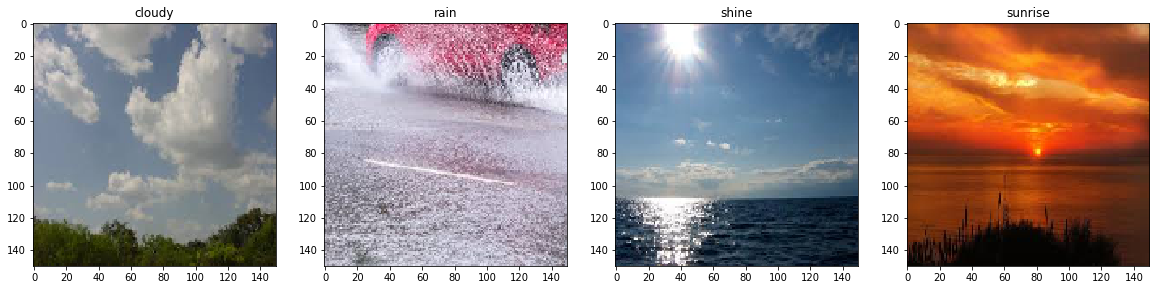

In [47]:
'''
# 4- Plot graph containing samples images from each class.
'''

# Write your code here
classes = ['cloudy','rain','shine','sunrise']

one_instance_of_each_class = [0] * 4

instances = os.listdir(base_path)

for ins in instances:
    instances_path = os.path.join(base_path,ins)
    
    if ins[0:2] == 'cl':
        one_instance_of_each_class[0] = (instances_path)
    if ins[0:2] == 'ra':
        one_instance_of_each_class[1] = (instances_path)
    if ins[0:2] == 'sh':
        one_instance_of_each_class[2] = (instances_path)
    if ins[0:2] == 'su':
        one_instance_of_each_class[3] = (instances_path)

width=150
height=150
depth = 3

fig=plt.figure(figsize=(20, 5))
columns = 4
rows = 1

for i in range(1, len(one_instance_of_each_class)+1):
    img = load_img(one_instance_of_each_class[i-1], target_size=(width,height,depth))
    fig.add_subplot(rows, columns, i)
    plt.title(classes[i-1])
    plt.imshow(img)
    
plt.show()

In [86]:
'''
5- Find average of instances per class, considering complete dataset and 
Count how many classes are containing instances less than average (Display the results)?
'''

# Write your code here

avg_instances = (cloudy_list + rain_list + shine_list + sunrise_list)/len(classes)
print("Total Average : ",avg_instances)

print("Instances less than average ",len(dataset[dataset['Instances'] < avg_instances]))

Total Average :  281.25
Instances less than average  2


In [136]:
'''
6- Perform data augmentation (only for shine and rain class, augment till 300 instances) to balance the data in 
each class, for augmenting, perform rotation over (-30 to 30) and horizontal flip. 
Make sure after this step, each class should contain same number of instances.
'''

# Write your code here

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-30, 30)
    return sk.transform.rotate(image_array, random_degree)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return image_array[:, ::-1]

# dictionary of the transformations we defined earlier
available_transformations = {
    'rotate': random_rotation,
    'flip': horizontal_flip
}

# Here we will define a function which will call all above functions
def augmentImage(command,arg):
    return available_transformations[command](arg)



total_inst = os.listdir(base_path)
total_inst

i = 0
j = 0

for ins in total_inst:

    src = os.path.join(base_path,ins)
    dst = ""
    
    if ins[0:2] == 'ra':
        if dataset['Instances'][1] < 300:
                name = "rain-aug-{}.jpg".format(i)
                dst = os.path.join(base_path,name)
                
                img_to_augment = sk.io.imread(src)
                img=""
                if i% 2 == 0:
                    img = augmentImage("flip",img_to_augment)
                else:
                    img = augmentImage("rotate",img_to_augment)
                
                i += 1
                io.imsave(dst,img)
                dataset['Instances'][1] += 1
    if ins[0:2] == 'sh':
        if dataset['Instances'][2] < 300:
                name2 = "shine-aug-{}.jpg".format(j)
                dst = os.path.join(base_path,name2)
                
                img_to_augment = sk.io.imread(src)
                img2=""
                
                if j% 2 == 0:
                    img2 = augmentImage("flip",img_to_augment)
                else:
                    img2 = augmentImage("rotate",img_to_augment)
                
                j += 1
                io.imsave(dst,img2)
                dataset['Instances'][2] += 1

In [137]:
dataset['Instances']

Cloudy     300
Rain       300
Shine      300
Sunrise    357
Name: Instances, dtype: int64

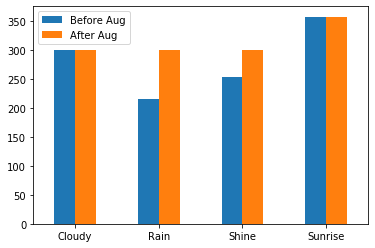

In [147]:
'''
7- Plot two graphs for original and after augmentation dataset in one plot for comparing.
'''

# Write your code here
instances
ins_after_aug = [dataset['Instances'][0],dataset['Instances'][1],dataset['Instances'][2],dataset['Instances'][3]]
ins_after_aug

full_df = pd.DataFrame(zip(instances,ins_after_aug),columns=['Before Aug','After Aug'],index=classes)
full_df.plot.bar(rot=0)

In [166]:
'''
8- Split the data into train (80%) and test (20%). Make sure to create seperate directories.
'''

# Write your code here


# This is base directory where we will store our data for processing
target_dir = 'E:\\Study\\IBA BSCS-VIII\\Data Science\\ds@ibau\\weather-image-classification-model'

# Creating base directory
if not os.path.exists(target_dir):
    os.mkdir(target_dir)

# This is train data directory path
train_dir = os.path.join(target_dir,"train")
# This is test data directory path
val_dir = os.path.join(target_dir,"val")

if not os.path.exists(train_dir):
    os.mkdir(train_dir)

if not os.path.exists(val_dir):
    os.mkdir(val_dir)

    
    
# cloudy
# rain
# shine
# sunrise


cloudy_train = os.path.join(train_dir,"cloudy")
rain_train = os.path.join(train_dir,"rain")
shine_train = os.path.join(train_dir,"shine")
sunrise_train = os.path.join(train_dir,"sunrise")

if not os.path.exists(cloudy_train):
    os.mkdir(cloudy_train)
if not os.path.exists(rain_train):
    os.mkdir(rain_train)
if not os.path.exists(shine_train):
    os.mkdir(shine_train)
if not os.path.exists(sunrise_train):
    os.mkdir(sunrise_train)
    
    
cloudy_val = os.path.join(val_dir,"cloudy")
rain_val = os.path.join(val_dir,"rain")
shine_val = os.path.join(val_dir,"shine")
sunrise_val = os.path.join(val_dir,"sunrise")

if not os.path.exists(cloudy_val):
    os.mkdir(cloudy_val)
if not os.path.exists(rain_val):
    os.mkdir(rain_val)
if not os.path.exists(shine_val):
    os.mkdir(shine_val)
if not os.path.exists(sunrise_val):
    os.mkdir(sunrise_val)
    
    
instances = os.listdir(base_path)

tmp = dataset.copy()
tmp
count_rain = 0
count_shine = 0
count_sunrise = 0
count_cloudy = 0

# Here we will copy each instance from train directory and paste it in all_data directory in corresponding class 
for instance in instances:
    src = os.path.join(base_path,instance)
    dst = ""
    if instance[0:2] == 'cl':
        
        if count_cloudy < (tmp["Instances"][0] * 0.8):
            dst = os.path.join(cloudy_train,instance)
        else:
            dst = os.path.join(cloudy_val,instance)
        count_cloudy +=  1
        
    if instance[0:2] == 'ra':
        
        if count_rain < (tmp["Instances"][1] * 0.8):
            dst = os.path.join(rain_train,instance)
        else:
            dst = os.path.join(rain_val,instance)
        count_rain += 1
    if instance[0:2] == 'sh':
        if count_shine < (tmp["Instances"][2] * 0.8):
            dst = os.path.join(shine_train,instance)
        else:
            dst = os.path.join(shine_val,instance)
        count_shine += 1  
    if instance[0:2] == 'su':
        if count_sunrise < (tmp["Instances"][3] * 0.8):
            dst = os.path.join(sunrise_train,instance)
        else:
            dst = os.path.join(sunrise_val,instance)
        count_sunrise += 1
        
    shutil.copyfile(src,dst)

In [167]:
'''
9- Apply CNN model ONLY with following configuration:
    - Input Size: (150, 150, 3)
    - Hidden Layers: 3
    - Neurons each layer (128, 64, 32)
    - Activation Function each layer: ReLU
    - Filter Size: (3, 3) 
    - Activation function on output layer: Decide and use???
'''

# Write your code here

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(4, activation='softmax'))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 128)       36992     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        18464     
__________

In [168]:
'''
10- Compile Model (use "adam" as optimizer, "categorical_crossentropy" as loss, "acc" as metrics) 
'''

# Write your code here

model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['acc'])

In [172]:
'''
11- Train and test model on 30 epochs
'''

# Write your code here

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=60,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=60,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=1,
      validation_data=validation_generator,
      validation_steps=50)

model.save('weather_model.h5')

Found 1006 images belonging to 4 classes.
Found 199 images belonging to 4 classes.


In [175]:
'''
12- Plot graph for train vs. test accuracy/loss
'''
# Write your code here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
'''
13- Observe graphs and comment about the model in terms of underfitting, overfitting and well trained model. 
'''

# Write your code here

# From the graph we can obseve that the model is underfit because we did not give enough time to model 
# to learn existing features

In [176]:
'''
14- Perform Experiments (Bonus Task)
    - Change number of layers/neurons
    - Change optimizer function as rmsprop
    - Train and compare graphs with each new experiment
'''

# Write your code here


model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       73856     
__________